In [ ]:
import pandas as pd

#importing necesary data
data_directory = '/content/project/data'

X = pd.read_pickle('{}/raw/X.pkl'.format(data_directory))
y = pd.read_pickle('{}/raw/y.pkl'.format(data_directory))

##1.EDA AND DATA PREPARATION

###LOADING DATA

In [ ]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


###SHAPE - ROWS AND COLUMNS

In [ ]:
a_dict = {'X' : X, 'y' : y}

for k in a_dict:
  rows, columns = a_dict[k].shape
  print("{} rows: {}".format(k, rows), '\n' '{} columns: {}\n'.format(k, columns))

X rows: 3750 
X columns: 10000

y rows: 3750 
y columns: 1



###DATA TYPES

In [ ]:
for k in a_dict:
  data_types = a_dict[k].columns.to_series().groupby(a_dict[k].dtypes).groups
  print("{} data types: {}\n".format(k, data_types.keys()))

X data types: dict_keys([dtype('float64')])

y data types: dict_keys([dtype('int64')])



###MISSING VALUES

In [ ]:
# Checking the missing values

for k in a_dict:
  data_nulls = a_dict[k].isnull().sum()
  print("{} missing values total: {}\n".format(k, data_nulls.sum()))
  print(data_nulls / a_dict[k].shape[0] * 100)
  print('_'*5)

X missing values total: 0

feature_0       0.0
feature_1       0.0
feature_2       0.0
feature_3       0.0
feature_4       0.0
               ... 
feature_9995    0.0
feature_9996    0.0
feature_9997    0.0
feature_9998    0.0
feature_9999    0.0
Length: 10000, dtype: float64
_____
y missing values total: 0

target    0.0
dtype: float64
_____


###DUPLICATES

In [ ]:
# Checking the duplicated values


X_duplicates = X.duplicated().sum()
print("{} duplicated values total: {}\n".format('X', X_duplicates))

X duplicated values total: 0



###DESCRIPTIVE STATISTICS

In [ ]:
X_desc = pd.read_pickle('{}/raw/X_desc.pkl'.format(data_directory))
X_desc

,count,mean,std,min,25%,50%,75%,max
feature_0,3750.0,30.644135,286.172414,-989.450,-163.78175,35.4785,215.78050,1224.394
feature_1,3750.0,9.080955,213.166659,-859.922,-135.34350,2.6805,156.09575,722.868
feature_2,3750.0,169.679419,43665.003613,-163336.428,-29284.11950,1181.6985,29630.91450,177744.241
feature_3,3750.0,811.083532,57123.457110,-243844.632,-38028.42900,980.5880,40561.96025,215372.854
feature_4,3750.0,-186.008805,21942.466227,-77566.109,-14426.79950,-154.8350,14515.83300,86287.955
...,...,...,...,...,...,...,...,...
feature_9995,3750.0,-1.426345,655.666258,-2165.769,-432.00075,-3.7965,425.33800,2562.331
feature_9996,3750.0,9.597250,204.731554,-739.205,-129.07625,8.6005,149.85575,685.176
feature_9997,3750.0,-2.031243,793.022407,-2731.037,-561.30400,-4.2430,539.55000,3123.617
feature_9998,3750.0,-2.841237,629.128655,-2223.909,-424.19275,-7.6280,427.79450,2204.527


####LOW/HIGH VARIANCE

#####HIGH/LOW VARIANCE PROBLEM
https://datascience.stackexchange.com/questions/37345/what-is-the-meaning-of-term-variance-in-machine-learning-model

1. What is high/low variance?
1. Over/underfitiing
1. Percentage vs max/min var
1. 10% cut up/bottom
1. Max - min var / specific var as indicator for high/low var
1. What is the importance of std or var in machine learning?

In [ ]:
X_desc['var'] = X_desc['std']**2
X_desc.sort_values(by=['std'])

####BIN COUNT FOR TARGET

In [ ]:
y.groupby(['target'])['target'].count()

target
-1     375
 1    3375
Name: target, dtype: int64

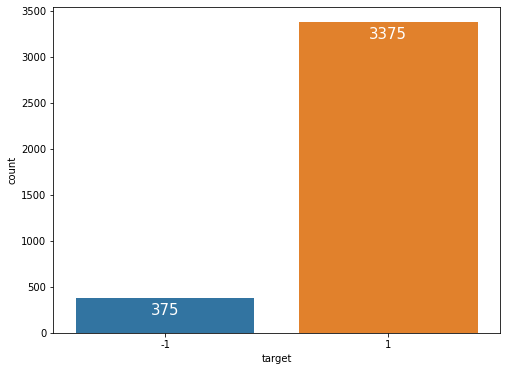

In [ ]:
import pickle as pkl

figure = pkl.load(open('/content/project/reports/figures/fig_01.png', 'rb'))
figure

###INTERCORRELATIONS
Analiza interkorelacji

https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

In [ ]:
cor_martix = pd.read_pickle('/content/project/data/raw/cor_matrix.pkl')
cor_martix

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
feature_0,1.000000,0.009717,0.007823,0.010449,0.023684,0.007333,0.015694,0.013918,0.018783,0.003965,...,0.026716,0.022556,0.002033,0.002774,0.006228,0.005980,0.004817,0.002374,0.004539,0.037154
feature_1,0.009717,1.000000,0.014160,0.023034,0.003338,0.001651,0.001523,0.002178,0.001311,0.012276,...,0.019026,0.000439,0.007821,0.021165,0.001081,0.017223,0.004058,0.002938,0.012621,0.016903
feature_2,0.007823,0.014160,1.000000,0.010302,0.015079,0.018820,0.012610,0.011906,0.027900,0.017817,...,0.005629,0.004751,0.012520,0.006561,0.035548,0.025339,0.032476,0.018478,0.017792,0.021163
feature_3,0.010449,0.023034,0.010302,1.000000,0.024708,0.000070,0.007635,0.006952,0.002488,0.000677,...,0.041789,0.006706,0.036258,0.031660,0.014701,0.006347,0.013508,0.010463,0.003039,0.015791
feature_4,0.023684,0.003338,0.015079,0.024708,1.000000,0.017415,0.018771,0.003130,0.004630,0.026460,...,0.026909,0.029244,0.010195,0.009255,0.001838,0.019803,0.004072,0.029769,0.000157,0.005128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_9995,0.005980,0.017223,0.025339,0.006347,0.019803,0.022484,0.001115,0.024465,0.010103,0.012017,...,0.000334,0.024582,0.011104,0.007001,0.013349,1.000000,0.014523,0.020255,0.011118,0.000510
feature_9996,0.004817,0.004058,0.032476,0.013508,0.004072,0.020380,0.004446,0.021117,0.002743,0.027519,...,0.003704,0.004205,0.009812,0.010792,0.007482,0.014523,1.000000,0.003054,0.002754,0.003309
feature_9997,0.002374,0.002938,0.018478,0.010463,0.029769,0.012821,0.003756,0.019836,0.010723,0.000662,...,0.002803,0.011812,0.026363,0.014296,0.022679,0.020255,0.003054,1.000000,0.022022,0.005820
feature_9998,0.004539,0.012621,0.017792,0.003039,0.000157,0.008822,0.003015,0.022031,0.013158,0.001864,...,0.014078,0.002885,0.015858,0.008329,0.005671,0.011118,0.002754,0.022022,1.000000,0.024653


In [ ]:
upper_tri = pd.read_pickle('/content/project/data/raw/upper_tri.pkl')
upper_tri

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
feature_0,NaN,0.009717,0.007823,0.010449,0.023684,0.007333,0.015694,0.013918,0.018783,0.003965,...,0.026716,0.022556,0.002033,0.002774,0.006228,0.005980,0.004817,0.002374,0.004539,0.037154
feature_1,NaN,NaN,0.014160,0.023034,0.003338,0.001651,0.001523,0.002178,0.001311,0.012276,...,0.019026,0.000439,0.007821,0.021165,0.001081,0.017223,0.004058,0.002938,0.012621,0.016903
feature_2,NaN,NaN,NaN,0.010302,0.015079,0.018820,0.012610,0.011906,0.027900,0.017817,...,0.005629,0.004751,0.012520,0.006561,0.035548,0.025339,0.032476,0.018478,0.017792,0.021163
feature_3,NaN,NaN,NaN,NaN,0.024708,0.000070,0.007635,0.006952,0.002488,0.000677,...,0.041789,0.006706,0.036258,0.031660,0.014701,0.006347,0.013508,0.010463,0.003039,0.015791
feature_4,NaN,NaN,NaN,NaN,NaN,0.017415,0.018771,0.003130,0.004630,0.026460,...,0.026909,0.029244,0.010195,0.009255,0.001838,0.019803,0.004072,0.029769,0.000157,0.005128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014523,0.020255,0.011118,0.000510
feature_9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003054,0.002754,0.003309
feature_9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022,0.005820
feature_9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024653


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(); print(to_drop)


['feature_5432']


In [ ]:
# correlation between features and target

corr_xy = pd.DataFrame(X.corrwith(y['target']).sort_values(ascending=False))
print(corr_xy)

                     0
feature_9719  0.067825
feature_5993  0.058873
feature_6372  0.055172
feature_3521  0.053143
feature_7660  0.052036
...                ...
feature_7513 -0.052811
feature_8368 -0.055450
feature_5938 -0.059311
feature_7054 -0.059558
feature_7902 -0.065335

[10000 rows x 1 columns]


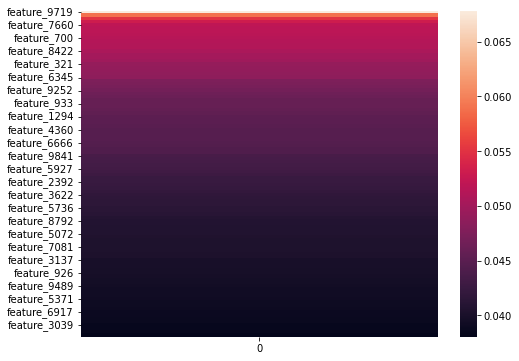

In [ ]:
import pickle as pkl

figure = pkl.load(open('/content/project/reports/figures/fig_02.png', 'rb'))
figure

####NOTE FOR INTERCORELLATIONS
1. What is the level for high correlation in this abstract task.
1. How many high correlated (point 1) features is enough?
1. Small amount of correlated features vs high amount of correlated features.

##2.STANDARIZATION

I wuld rather move computations to another file from here.


###STANDARD SCALER

Standard after spliting data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(data = X, columns = features)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,0.956603,-2.090995,-0.779319,-1.705003,-0.679182,-1.152735,-0.520916,0.328344,-0.407837,-2.204406,...,0.302007,-0.046534,-1.034740,0.476194,-0.595632,-2.131212,0.161407,0.975154,-0.299314,1.715553
1,0.081790,0.380063,-0.007431,-0.086273,1.757154,-0.864456,1.214323,0.293748,1.502145,0.643388,...,-0.707085,-0.820444,-2.130636,0.163723,-0.142053,-0.421798,-0.529819,-1.465157,0.426158,-1.340783
2,0.844093,-0.989109,0.092602,-0.173940,-1.606071,-1.482817,-0.591553,-0.570965,-1.099315,-0.744593,...,1.142062,-0.728438,0.453446,1.796409,-0.166745,-0.263702,-0.719131,-1.979327,1.082855,1.278390
3,0.487054,0.279889,1.110703,0.506412,-0.625261,1.221940,-0.314777,-0.955742,-1.326159,-0.196054,...,-1.574800,0.695451,1.096150,0.211454,2.165549,0.227377,0.106670,-0.987100,0.916110,1.843469
4,0.196247,0.802160,-1.140956,0.029840,1.202957,-0.608846,-0.238682,-0.083731,-0.327290,-0.241897,...,-0.430029,-0.817988,0.055310,-0.703622,0.500416,0.023897,1.259157,-0.293257,-0.335370,1.087226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,1.076050,-0.503415,-0.862558,-0.055282,-0.004800,0.741343,1.132077,0.428989,1.880958,0.147017,...,1.250072,-1.153307,1.537867,-0.966474,0.066785,0.503467,0.468240,-0.462599,0.605455,-0.378908
3746,0.261649,-0.828331,1.243216,-0.680494,-0.556439,0.963510,0.084122,-1.607334,-0.349195,-1.438059,...,-0.034319,-0.055959,0.308261,-0.023961,-1.323867,-0.138543,0.373772,-0.003662,0.693934,-0.511764
3747,0.218575,-0.771185,-0.383086,-0.199883,-0.129528,-0.149292,-2.479446,-0.078812,-1.621631,-1.130816,...,-1.325665,-0.317795,-0.057320,1.089051,0.732304,-0.868406,-0.075266,1.008543,-0.455180,-2.685843
3748,2.888231,0.418043,-0.907012,0.444785,-0.058312,-0.514735,-1.132560,1.118615,0.236770,-1.250731,...,0.694050,-2.688472,-0.235554,0.803295,-0.250858,-0.819413,0.643698,0.699954,0.497534,0.219981


##3.FEATURE SELECTION

In [ ]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
scores = {'Feature' : [],
          'Score' : []}

for i in range(len(fs.scores_)):
  scores['Feature'] += [i]
  scores['Score'] += [fs.scores_[i]]
  #print('Feature %d: %f' % (i, fs.scores_[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Feature 5000: 0.541186
Feature 5001: 0.977932
Feature 5002: 0.000277
Feature 5003: 0.651572
Feature 5004: 0.324190
Feature 5005: 0.133041
Feature 5006: 0.183496
Feature 5007: 0.648576
Feature 5008: 0.135608
Feature 5009: 0.760994
Feature 5010: 0.915083
Feature 5011: 0.391336
Feature 5012: 0.594680
Feature 5013: 0.240625
Feature 5014: 0.871243
Feature 5015: 0.243237
Feature 5016: 0.008486
Feature 5017: 0.172560
Feature 5018: 0.349131
Feature 5019: 0.417399
Feature 5020: 2.303078
Feature 5021: 3.084227
Feature 5022: 0.188876
Feature 5023: 0.600171
Feature 5024: 2.240325
Feature 5025: 0.304052
Feature 5026: 0.217569
Feature 5027: 1.149597
Feature 5028: 0.002999
Feature 5029: 0.422502
Feature 5030: 0.005876
Feature 5031: 0.304097
Feature 5032: 6.639239
Feature 5033: 0.941677
Feature 5034: 1.433166
Feature 5035: 4.388999
Feature 5036: 0.108596
Feature 5037: 3.441690
Feature 5038: 0.008786
Feature 5039: 0.000099
Feature 5040: 0

In [ ]:
scores_df = pd.DataFrame(scores)

In [ ]:
scores_filtered = scores_df.where(scores_df['Score'] > 5).dropna().sort_values(by='Score', ascending=False)

In [ ]:
features_list = [int(x) for x in scores_filtered['Feature'].tolist()]
len(features_list)
features_list

[7054,
 7660,
 6345,
 3967,
 6600,
 4600,
 1718,
 6642,
 5541,
 4286,
 8792,
 8660,
 9145,
 9756,
 2747,
 7163,
 5938,
 7902,
 1805,
 926,
 3149,
 1468,
 4304,
 4485,
 1033,
 648,
 137,
 321,
 3349,
 1820,
 4906,
 8268,
 9252,
 7760,
 3495,
 805,
 9719,
 4697,
 9382,
 6036,
 5755,
 9837,
 3394,
 237,
 2014,
 4559,
 5551,
 1871,
 9309,
 1357,
 9957,
 4539,
 916,
 795,
 7859,
 5546,
 6195,
 1766,
 5174,
 2037,
 8061,
 6257,
 366,
 8659,
 7768,
 4661,
 2992,
 7270,
 5993,
 7941,
 635,
 26,
 1852,
 1492,
 3504,
 4162,
 8811,
 6965,
 6717,
 5906,
 7250,
 3521,
 364,
 2968,
 422,
 1556,
 7619,
 7360,
 6897,
 6145,
 2027,
 8467,
 8230,
 7661,
 6552,
 8661,
 8525,
 6419,
 5955,
 2444,
 55,
 4530,
 5032,
 8196,
 4341,
 3498,
 8038,
 9762,
 6266,
 7212,
 6014,
 2276,
 7738,
 6189,
 5925,
 3120,
 1472,
 8721,
 6141,
 6585,
 441,
 4040,
 3886,
 5173,
 1314,
 1598,
 715,
 257,
 5566,
 7033,
 1546,
 1243,
 1320,
 9385,
 836,
 885,
 6593,
 4356,
 505,
 2816,
 336,
 933,
 3622,
 4681,
 7603,
 520,
 44

###BASELINE


In [ ]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 27.46


###ANOVA AND TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)